In [10]:
from rdkit import Chem

# Load the SDF file
supplier = Chem.SDMolSupplier('../Data/input.sdf')

# Iterate through the molecules in the SDF file
for mol in supplier:
    if mol is not None:
        print(Chem.MolToSmiles(mol))

CNc1ccnc2ccnn12


In [ ]:
for 

,Corporate ID,ADME MDCK(WT) Permeability;Mean;A to B Recovery (%),Molecular weight (g/mol),log P,ID,Structure,Molecular Name
0,V1555491,70,772.829,5.9,V1555491,CNc1ccnc2ccnn12,

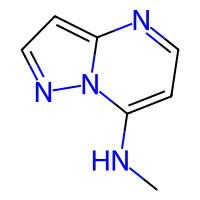

In [12]:
from rdkit.Chem import PandasTools
fileNameIn = '../Data/input.sdf'
colName_mid = 'Molecular Name'
colName_smi = 'Structure'
test_df = PandasTools.LoadSDF(fileNameIn, molColName=colName_mid, smilesName=colName_smi, includeFingerprints=False)
test_df

In [13]:
'ADME MDCK(WT) Permeability;Mean;A to B Recovery (%)' in test_df.columns

True

In [ ]:
colName_mid

In [7]:
def load_sdf_file(fileNameIn, colName_mid, colName_smi, custDesc_list=[], colName_expt=None):
    ## ----------- load table from sdf file -----------
    # import DataPrep
    import numpy as np
    from rdkit.Chem import PandasTools
    
    ## ----------- load table from csv file -----------
    dataTable_raw = PandasTools.LoadSDF(fileNameIn, molColName='Molecule', smilesName=colName_smi, includeFingerprints=False)
    print(f"\t\tThe input file has {dataTable_raw.shape[0]} rows and {dataTable_raw.shape[1]} columns")

    ## ----------- check columns -----------
    col_list_essential = [colName_mid, colName_smi]
    if colName_expt is not None:
        col_list_essential.append(colName_expt)

    ## check custom descriptors
    if len(custDesc_list) > 0:
        for custDesc in custDesc_list:
            custDesc_raw = custDesc.replace('custDesc_', '')
            assert custDesc_raw in dataTable_raw.columns, print(f"\t\tError, custom descriptor column <{custDesc_raw}> is missing")
            dataTable_raw = dataTable_raw.rename(columns={custDesc_raw: custDesc})

    for col in col_list_essential:
        assert col in dataTable_raw.columns, print(f"\t\tError, column <{col}> is missing")

    ## ----------- extract data -----------
    mol_dict = {}
    for idx in dataTable_raw.index:
        mol_dict[idx] = {}
      
        ## ----------- molecular name/id -----------
        mid = dataTable_raw[colName_mid][idx] if dataTable_raw[colName_mid].notna()[idx] else f"Unamed_mol_row_{idx}"
        mol_dict[idx][colName_mid] = mid

        ## ----------- smiles -----------
        if dataTable_raw[colName_smi].notna()[idx]:
            smi = dataTable_raw[colName_smi][idx]
            smi_clean = smi    #DataPrep.cleanUpSmiles(smi)
            mol_dict[idx][colName_smi] = smi_clean
        else:
            mol_dict[idx][colName_smi] = np.nan

        ## ----------- expt(y) ----------- 
        if colName_expt is not None:
            if dataTable_raw[colName_expt].notna()[idx]:
                mol_dict[idx][colName_expt] = dataTable_raw[colName_expt][idx]

        # ----------- custom desc --------------
        if len(custDesc_list) > 0:
            for custDesc in custDesc_list:
                if dataTable_raw[custDesc].notna()[idx]:
                    mol_dict[idx][custDesc] = dataTable_raw[custDesc][idx]
                else:
                    mol_dict[idx][custDesc] = np.nan
    return mol_dict


In [9]:
fileNameIn = '../Data/input.sdf'
colName_mid = 'Corporate ID'   
colName_smi = 'Structure'
mol_dict = load_sdf_file(fileNameIn, colName_mid, colName_smi, custDesc_list=[], colName_expt=None)
mol_dict

		The input file has 1 rows and 4 columns


{0: {'Corporate ID': 'V1555491', 'Structure': 'CNc1ccnc2ccnn12'}}